In [1]:
import pandas as pd
import numpy as np
import kagglehub
from kagglehub import KaggleDatasetAdapter
import os

c:\Users\akulk\miniconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
path = kagglehub.dataset_download("philiphyde1/nfl-stats-1999-2022")
print("Dataset is here:", path)

for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))


yearly_offense_df = pd.read_csv(path + "\yearly_player_stats_offense.csv")

Dataset is here: C:\Users\akulk\.cache\kagglehub\datasets\philiphyde1\nfl-stats-1999-2022\versions\17
C:\Users\akulk\.cache\kagglehub\datasets\philiphyde1\nfl-stats-1999-2022\versions\17\weekly_player_stats_defense.csv
C:\Users\akulk\.cache\kagglehub\datasets\philiphyde1\nfl-stats-1999-2022\versions\17\weekly_player_stats_offense.csv
C:\Users\akulk\.cache\kagglehub\datasets\philiphyde1\nfl-stats-1999-2022\versions\17\weekly_team_stats_defense.csv
C:\Users\akulk\.cache\kagglehub\datasets\philiphyde1\nfl-stats-1999-2022\versions\17\weekly_team_stats_offense.csv
C:\Users\akulk\.cache\kagglehub\datasets\philiphyde1\nfl-stats-1999-2022\versions\17\yearly_player_stats_defense.csv
C:\Users\akulk\.cache\kagglehub\datasets\philiphyde1\nfl-stats-1999-2022\versions\17\yearly_player_stats_offense.csv
C:\Users\akulk\.cache\kagglehub\datasets\philiphyde1\nfl-stats-1999-2022\versions\17\yearly_team_stats_defense.csv
C:\Users\akulk\.cache\kagglehub\datasets\philiphyde1\nfl-stats-1999-2022\versions\17\

In [20]:
categories = [
    #Identification of player
    "player_name", "position", "team", "depth_team", "season", "season_type", "age",
    # Passing
    "pass_attempts", "complete_pass", "passing_yards", "pass_touchdown", "interception",

    # Rushing
    "rush_attempts", "rushing_yards", "rush_touchdown", "fumble",

    # Receiving
    "targets", "receptions", "receiving_yards", "receiving_touchdown", "yards_after_catch",

    # Fantasy Points
    "season_fantasy_points_ppr", "season_fantasy_points_standard"



    ]

yearly_offense_df = yearly_offense_df[categories]
yearly_offense_df = yearly_offense_df[yearly_offense_df["season_type"] == "REG"]





In [ ]:
yearly_offense_qbs = yearly_offense_df[yearly_offense_df["position"] == "QB"]
yearly_offense_rbs = yearly_offense_df[yearly_offense_df["position"] == "RB"]
yearly_offense_wrs = yearly_offense_df[yearly_offense_df["position"] == "WR"]
yearly_offense_tes = yearly_offense_df[yearly_offense_df["position"] == "TE"]
yearly_offense_ks = yearly_offense_df[yearly_offense_df["position"] == "K"]





          player_name position team  depth_team  season season_type   age  \
0       Charlie Batch       QB  PIT         3.0    2012         REG  37.0   
4     Matt Hasselbeck       QB  TEN         2.0    2012         REG  36.0   
6      Peyton Manning       QB  DEN         1.0    2012         REG  36.0   
12          Tom Brady       QB   NE         1.0    2012         REG  35.0   
18         Drew Brees       QB   NO         1.0    2012         REG  33.0   
...               ...      ...  ...         ...     ...         ...   ...   
7084           Bo Nix       QB  DEN         1.0    2024         REG  24.0   
7107       Drake Maye       QB   NE         1.0    2024         REG  22.0   
7123   Jayden Daniels       QB  WAS         1.0    2024         REG  23.0   
7128    Michael Penix       QB  ATL         2.0    2024         REG  24.0   
7129   Caleb Williams       QB  CHI         1.0    2024         REG  22.0   

      pass_attempts  complete_pass  passing_yards  ...  rushing_yards  \
0 

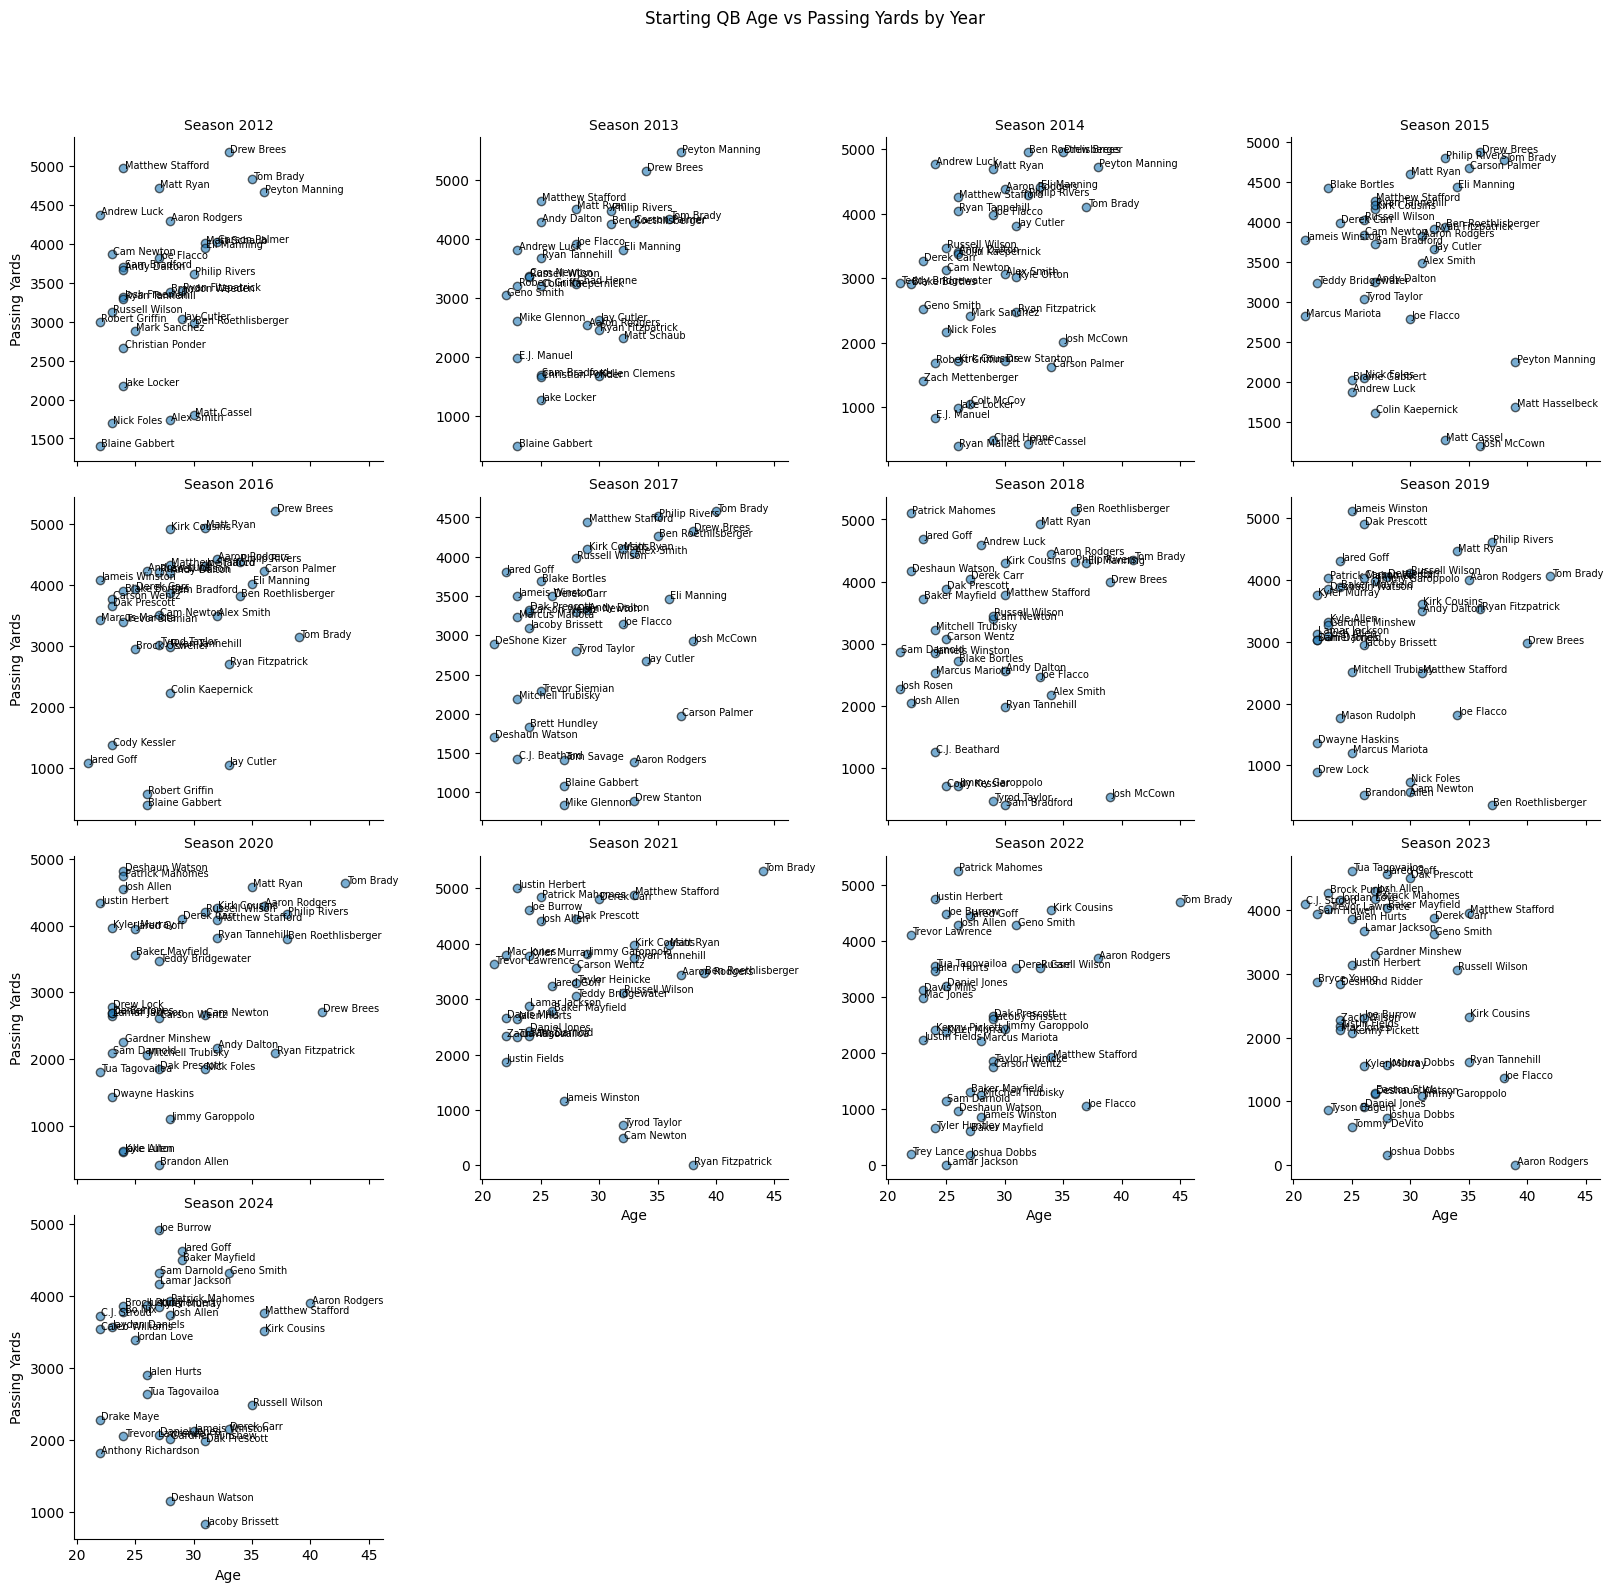

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

qbs = yearly_offense_qbs[yearly_offense_qbs["depth_team"] <= 1.0]

# Create facet grid with one scatter per year
import seaborn as sns
import matplotlib.pyplot as plt

def add_labels(data, **kwargs):
    plt.scatter(data["age"], data["passing_yards"], alpha=0.6, edgecolor="k")
    for _, row in data.iterrows():
        plt.text(
            row["age"] + 0.1, row["passing_yards"], 
            row["player_name"], fontsize=7
        )

g = sns.FacetGrid(qbs, col="season", col_wrap=4, height=4, sharey=False, sharex=True)
g.map_dataframe(add_labels)

g.set_axis_labels("Age", "Passing Yards")
g.set_titles("Season {col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Starting QB Age vs Passing Yards by Year")
plt.show()


C:\Users\akulk\AppData\Local\Temp\ipykernel_14028\1540235218.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


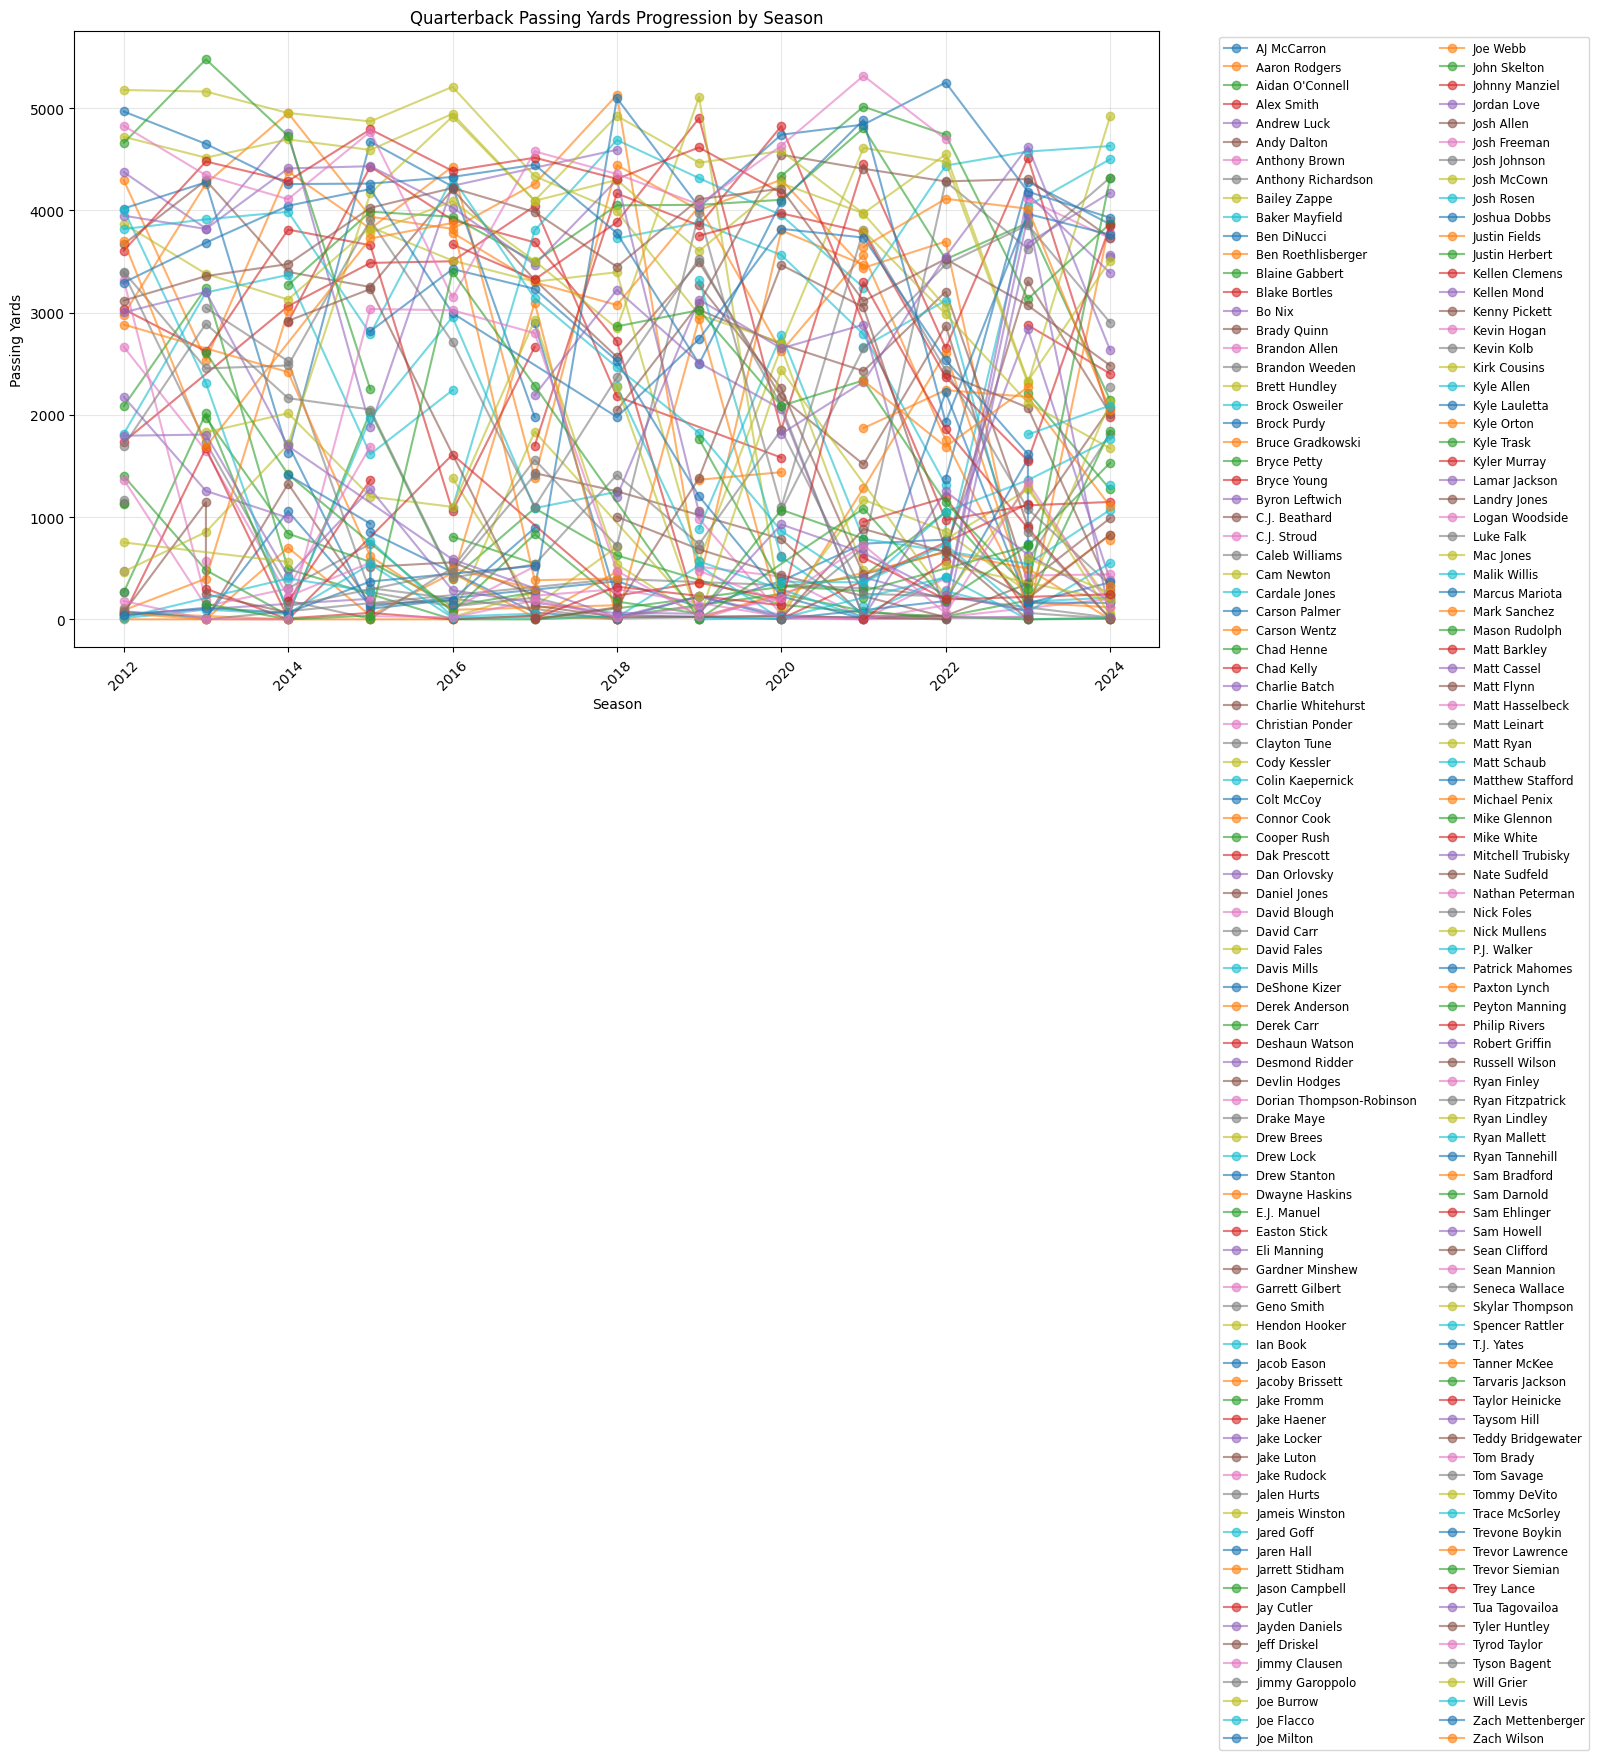

In [34]:
import matplotlib.pyplot as plt

# Make sure only starters (depth = 1) are included if that's your rule
qbs = yearly_offense_qbs

# Group by player and plot each QB's line
plt.figure(figsize=(14, 8))

for player, data in qbs.groupby("player_name"):
    data = data.sort_values("season")
    plt.plot(data["season"], data["passing_yards"], marker="o", linestyle="-", alpha=0.6, label=player)

# Labels and title
plt.xlabel("Season")
plt.ylabel("Passing Yards")
plt.title("Quarterback Passing Yards Progression by Season")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Show only top legend (avoiding clutter with 100+ QBs)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small", ncol=2)

plt.tight_layout()
plt.show()

C:\Users\akulk\AppData\Local\Temp\ipykernel_14028\4246811242.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbs["percentile"] = qbs.groupby("season")["passing_yards"].rank(pct=True)
C:\Users\akulk\AppData\Local\Temp\ipykernel_14028\4246811242.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbs["percentile_group"] = pd.cut(
C:\Users\akulk\AppData\Local\Temp\ipykernel_14028\4246811242.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of

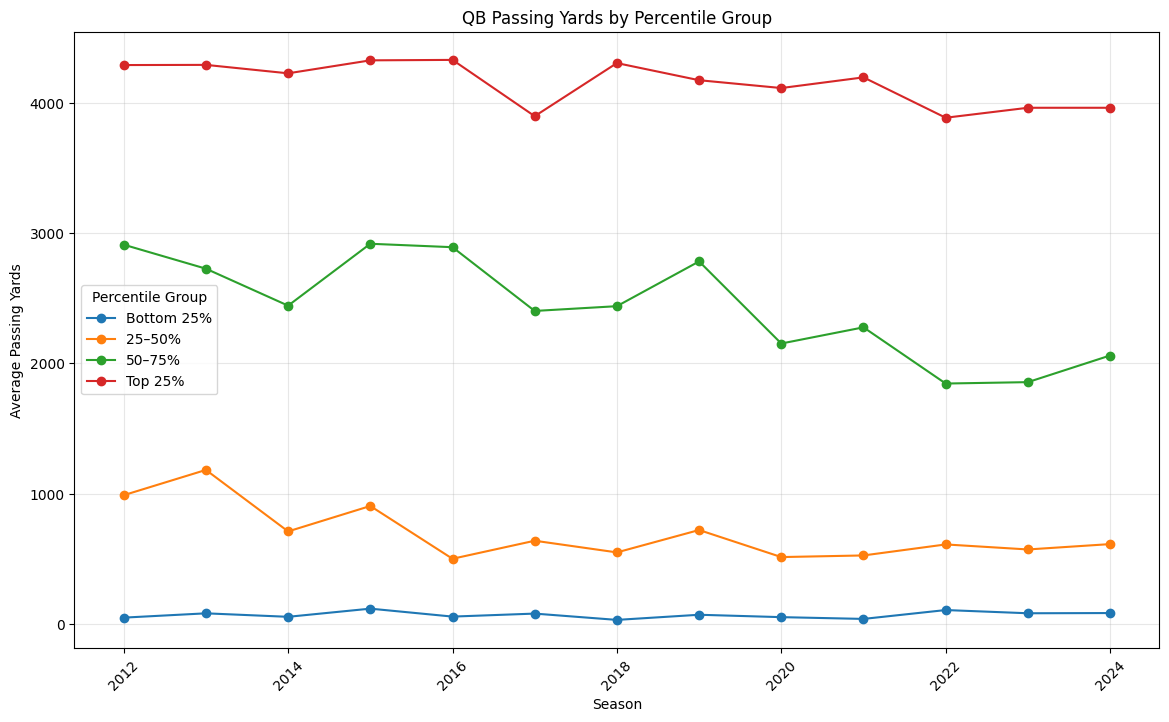

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Keep only starting QBs if needed
qbs = yearly_offense_qbs

# Compute percentile ranks for each season
qbs["percentile"] = qbs.groupby("season")["passing_yards"].rank(pct=True)

# Categorize into bins
qbs["percentile_group"] = pd.cut(
    qbs["percentile"],
    bins=[0, 0.25, 0.5, 0.75, 1.0],
    labels=["Bottom 25%", "25–50%", "50–75%", "Top 25%"]
)

# Plot: Average passing yards for each percentile group per season
plt.figure(figsize=(14, 8))

for group, data in qbs.groupby("percentile_group"):
    avg = data.groupby("season")["passing_yards"].mean()
    plt.plot(avg.index, avg.values, marker="o", linestyle="-", label=group)

plt.xlabel("Season")
plt.ylabel("Average Passing Yards")
plt.title("QB Passing Yards by Percentile Group")
plt.legend(title="Percentile Group")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.show()

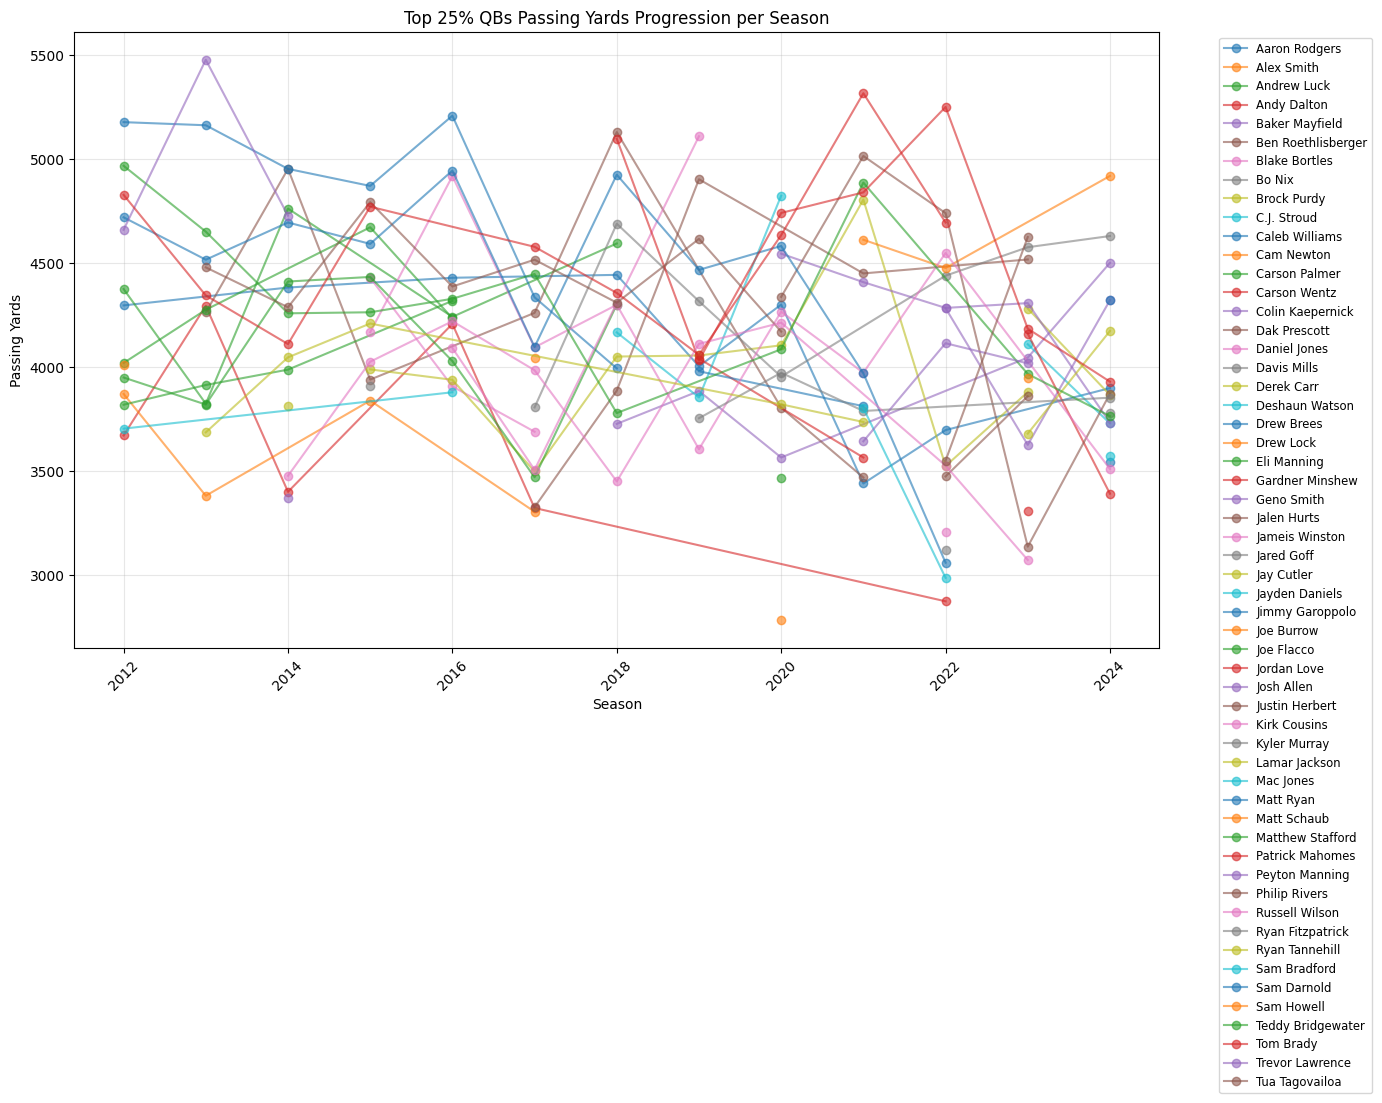

In [39]:

# Filter only top 25% QBs
top_qbs = qbs[qbs["percentile_group"] == "Top 25%"]

plt.figure(figsize=(14, 8))

# Plot each QB's passing yards across seasons
for player, data in top_qbs.groupby("player_name"):
    plt.plot(
        data["season"], 
        data["passing_yards"], 
        marker="o", 
        linestyle="-", 
        alpha=0.6, 
        label=player
    )

plt.xlabel("Season")
plt.ylabel("Passing Yards")
plt.title("Top 25% QBs Passing Yards Progression per Season")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize="small")


# If too many players, we might want to skip the legend
# otherwise uncomment this:
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

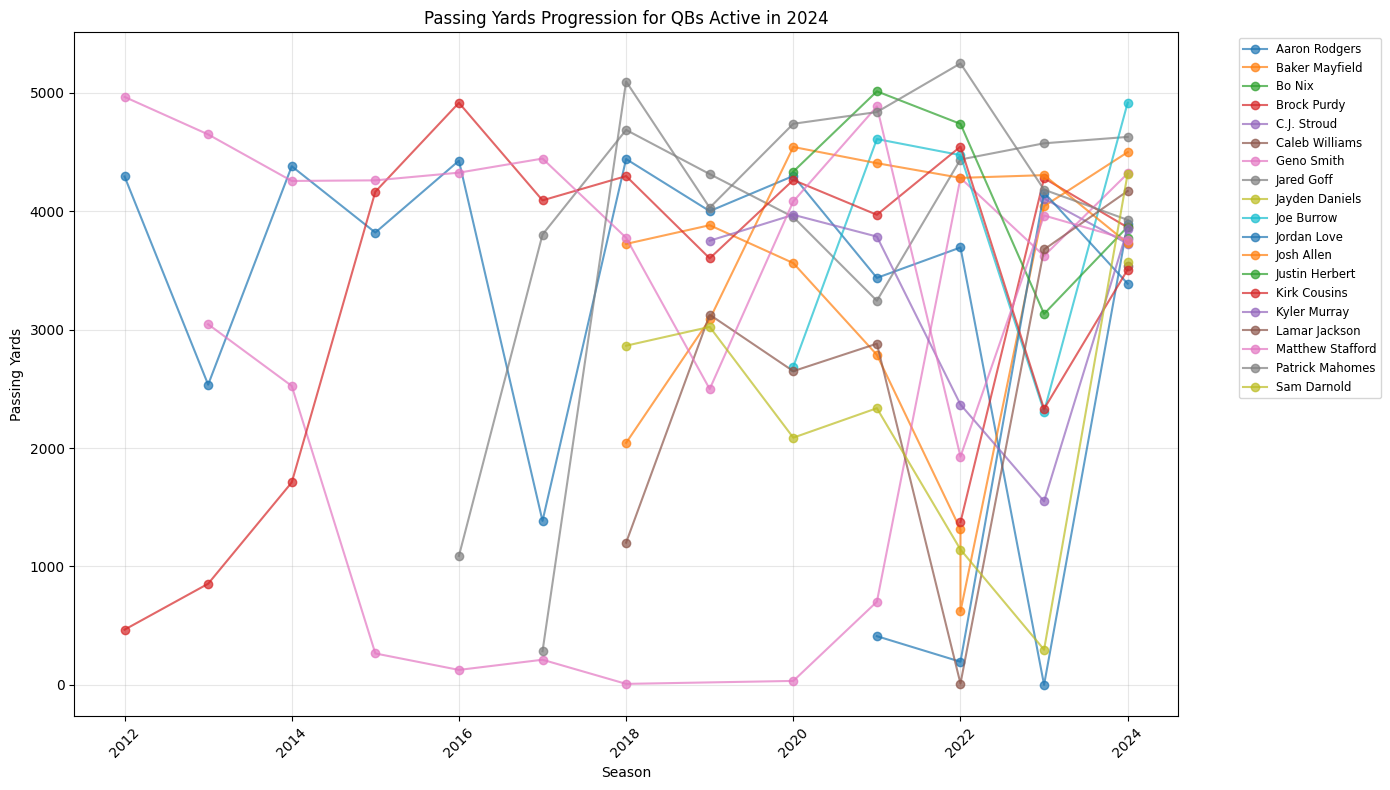

In [41]:
# Find QBs who played in 2024
qbs_2024 = qbs[(qbs["position"] == "QB") & (qbs["season"] == 2024) & (qbs["percentile_group"] == "Top 25%")]["player_name"].unique()

# Filter dataset to include only those QBs across all seasons
qbs_active_2024 = qbs[qbs["player_name"].isin(qbs_2024)]

plt.figure(figsize=(14, 8))

# Plot each QB's passing yards progression
for player, data in qbs_active_2024.groupby("player_name"):
    plt.plot(
        data["season"],
        data["passing_yards"],
        marker="o",
        linestyle="-",
        alpha=0.7,
        label=player
    )

plt.xlabel("Season")
plt.ylabel("Passing Yards")
plt.title("Passing Yards Progression for QBs Active in 2024")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize="small")

plt.tight_layout()
plt.show()

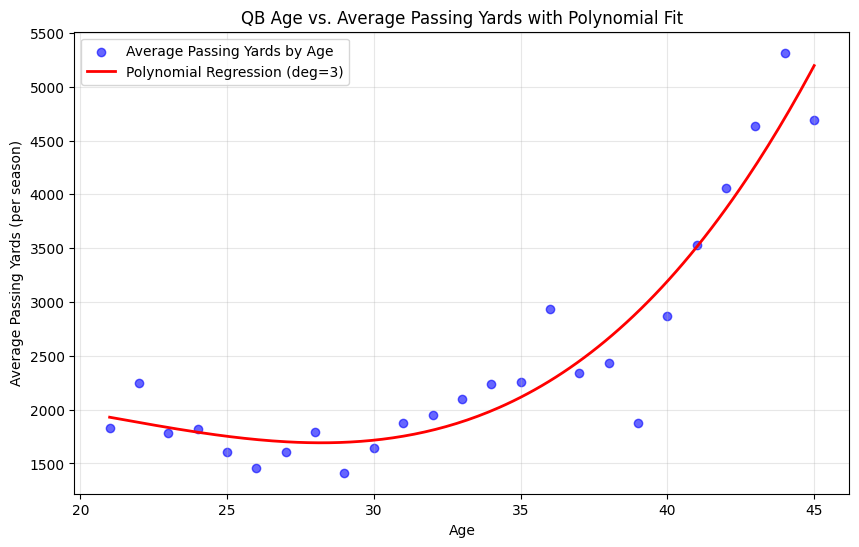

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Filter only QBs
qbs_only = yearly_offense_df[yearly_offense_df["position"] == "QB"].copy()

# Compute average passing yards by age
avg_yards_by_age = qbs_only.groupby("age")["passing_yards"].mean().reset_index()

# Extract X (age) and y (average passing yards)
X = avg_yards_by_age["age"].values
y = avg_yards_by_age["passing_yards"].values

# Fit a polynomial regression (degree 2 or 3 works well usually)
degree = 3
coeffs = np.polyfit(X, y, degree)
poly = np.poly1d(coeffs)

# Create smooth curve for plotting
X_smooth = np.linspace(X.min(), X.max(), 200)
y_smooth = poly(X_smooth)

# Plot actual averages
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", alpha=0.6, label="Average Passing Yards by Age")

# Plot polynomial regression curve
plt.plot(X_smooth, y_smooth, color="red", linewidth=2, label=f"Polynomial Regression (deg={degree})")

plt.xlabel("Age")
plt.ylabel("Average Passing Yards (per season)")
plt.title("QB Age vs. Average Passing Yards with Polynomial Fit")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\akulk\AppData\Local\Temp\ipykernel_14028\2028322594.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  qbs_only.groupby(["age", "percentile"])["passing_yards"]
C:\Users\akulk\AppData\Local\Temp\ipykernel_14028\2028322594.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for perc, group in avg_yards_by_age.groupby("percentile"):


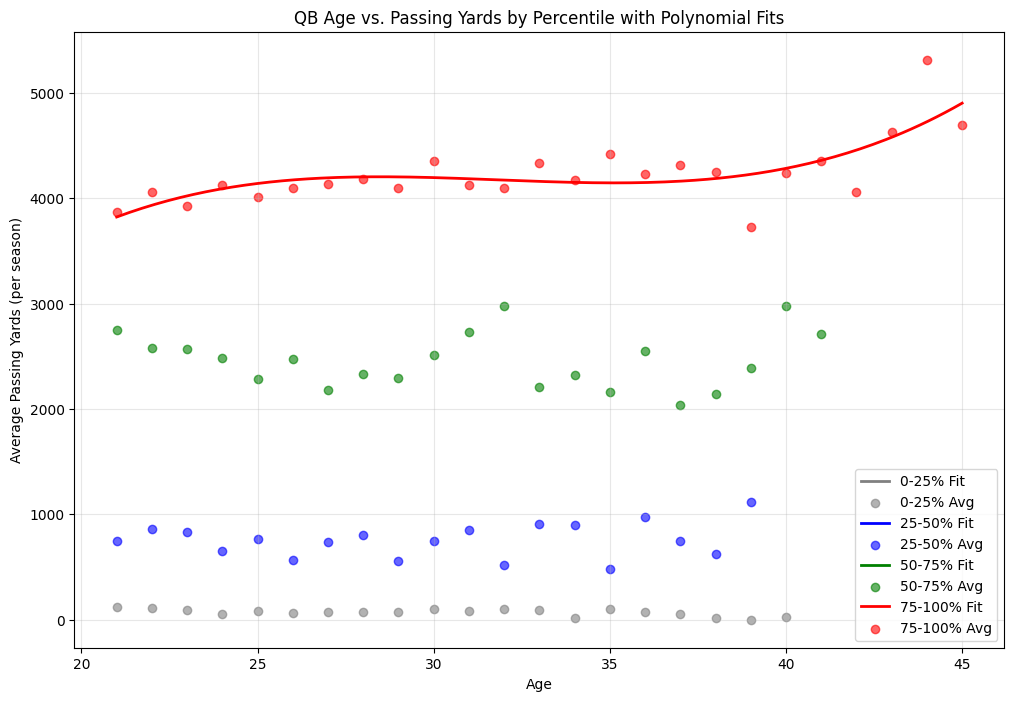

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Filter only QBs
qbs_only = yearly_offense_df[yearly_offense_df["position"] == "QB"].copy()

# Compute percentiles of passing yards by season
percentiles = qbs_only.groupby("season")["passing_yards"].transform(
    lambda x: pd.qcut(x, q=4, labels=["0-25%", "25-50%", "50-75%", "75-100%"])
)
qbs_only["percentile"] = percentiles

# Compute average yards per age per percentile group
avg_yards_by_age = (
    qbs_only.groupby(["age", "percentile"])["passing_yards"]
    .mean()
    .reset_index()
)

# Plot each percentile group with its polynomial fit
plt.figure(figsize=(12, 8))

colors = {
    "0-25%": "gray",
    "25-50%": "blue",
    "50-75%": "green",
    "75-100%": "red"
}

for perc, group in avg_yards_by_age.groupby("percentile"):
    X = group["age"].values
    y = group["passing_yards"].values

    # Fit polynomial regression
    if len(X) > 3:  # need enough points to fit
        degree = 3
        coeffs = np.polyfit(X, y, degree)
        poly = np.poly1d(coeffs)

        # Smooth curve
        X_smooth = np.linspace(X.min(), X.max(), 200)
        y_smooth = poly(X_smooth)

        # Plot curve
        plt.plot(X_smooth, y_smooth, color=colors[perc], linewidth=2, label=f"{perc} Fit")

    # Scatter actual averages
    plt.scatter(X, y, color=colors[perc], alpha=0.6)

plt.xlabel("Age")
plt.ylabel("Average Passing Yards (per season)")
plt.title("QB Age vs. Passing Yards by Percentile with Polynomial Fits")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
